In [1]:
import sys, cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import collections

In [2]:
with open('sortedFish.pik','rb') as f:
    sortedFish=pickle.load(f)

posU=sortedFish[0]
nonOverlappingRange=sortedFish[1]
fishU=sortedFish[2]

#### First two nonOverlappingRanges

171.2
171.26666666666668


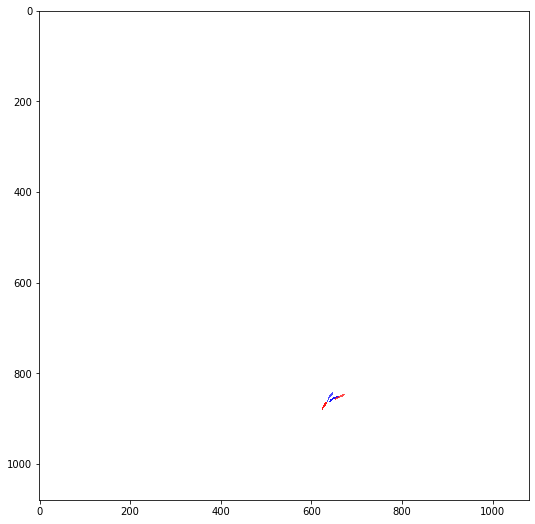

In [3]:
i1 = nonOverlappingRange[0][1]-1
i2 = nonOverlappingRange[1][0]

img = 255*np.ones((1080,1080,3),dtype=np.uint8)
plt.figure(figsize=(9,9))

for i in [i1,i2]:

    print((5000+i)/30)
    
    fish= fishU[i][0].T
    rows=fish[0].astype(int)
    cols=fish[1].astype(int)
    img[rows,cols]=(255,0,0)

    fish= fishU[i][1].T
    rows=fish[0].astype(int)
    cols=fish[1].astype(int)
    img[rows,cols]=(0,0,255)

    plt.imshow(img,alpha=.7)
plt.show()

### Check Function

In [22]:
def manualChecker(n):
    i1 = nonOverlappingRange[n][1]-1
    i2 = nonOverlappingRange[n+1][0]

    for i in [i1,i2]:

        #print((5000+i)/30)

        fish= fishU[i][0].T
        rows=fish[0].astype(int)
        cols=fish[1].astype(int)
        img[rows,cols]=(255,0,0)

        fish= fishU[i][1].T
        rows=fish[0].astype(int)
        cols=fish[1].astype(int)
        img[rows,cols]=(0,0,255)

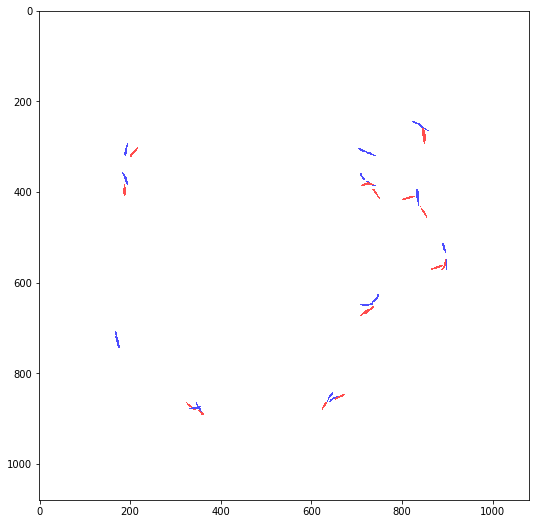

In [27]:
img = 255*np.ones((1080,1080,3),dtype=np.uint8)
plt.figure(figsize=(9,9))

for i in range(0,10):
    manualChecker(i)
plt.imshow(img,alpha=.7)
plt.show()